In [2]:
from pathlib import Path

import awkward as ak
import dask
import dask_awkward as dak
import hist.dask as hda
import coffea
import numpy as np
import uproot
from dask.distributed import Client
import matplotlib.pyplot as plt
import hist
from hist import Hist
import vector 
vector.register_awkward()



# warnings.filterwarnings("ignore")
# NanoAODSchema.warn_missing_crossrefs = False

In [3]:
root_files = [
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/2600A354-96F9-4C48-99FA-D77C85CB7806.root',
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/5D5B49D9-669B-4341-AEAD-84E93D030183.root',
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/AC35834A-C266-1145-A3B9-CFF25C7E5A3A.root',
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/D2D02B2B-C5B6-5149-B980-0F895160AFE2.root',
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/D9B078A0-BF72-1540-8126-76D9EE62EA43.root',
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/E47340A9-16AB-3046-AFAD-3C326D9B24C9.root',
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/EF9187B2-C362-AC45-91A3-2957408AC9BF.root',
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/F52729E5-A808-C14F-B745-D407CA81A541.root',
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/5FEEB37C-1AFB-904F-899D-E1F3B611D6BE.root',
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/61C48E28-41EA-3A4B-B383-5D6A369A05F8.root',
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/6E406F72-FCBF-934D-9332-B95C5C2237B6.root',
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/72901C50-923E-8248-BD3A-B72CEBA3FBAB.root',
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/7624D7D9-CF17-D042-AAAC-19D1D8566712.root',
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/7C9FB089-2D79-1D4A-BD85-4AED948C4EAC.root',
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/887E1A12-5D73-6448-8F4A-E8182C4E6A9B.root',
    'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/Higgs0Mf05ph0ToWW_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v2/40000/90AC6A60-E4C0-BC40-B123-493E6C05A24E.root'
]

In [4]:

def create_lepton_vector(lepton):
    """Create 4-vector from lepton properties - unified function"""
    return vector.array({
        "pt": lepton.pt,
        "eta": lepton.eta,
        "phi": lepton.phi,
        "mass": lepton.mass
    })


## THIS IS WITHOUT DASK -- SEQUENTIAL PROCESSING

In [5]:
def process_file(root_files):
    columns = [
        "Electron_pt", "Electron_eta", "Electron_phi", "Electron_mass", 
        "Electron_mvaFall17V2Iso_WP90", "Electron_charge",
        
        "Muon_pt", "Muon_eta", "Muon_phi", "Muon_mass", 
        "Muon_tightId", "Muon_charge", "Muon_pfRelIso04_all",
        "MET_pt", "MET_phi",
    ]
    
    masses = []
    
    for events in uproot.iterate(
        f"{root_files}: Events",
        # "Events",
        columns,
        library="ak",
        step_size= "100 MB",):
        
        mask = (ak.num(events.Electron_pt)>0) & (ak.num(events.Muon_pt)>0)
        events = events[mask]
        
        if len(events) ==0:
            continue

        elec = ak.zip(
            {
                 "pt": events.Electron_pt[:, 0],
                "eta": events.Electron_eta[:, 0],
                "phi": events.Electron_phi[:, 0],
                "mass": events.Electron_mass[:, 0],
            }, with_name = "Momentum4D",
        )

        muon = ak.zip(
            {
                 "pt": events.Muon_pt[:, 0],
                "eta": events.Muon_eta[:, 0],
                "phi": events.Muon_phi[:, 0],
                "mass": events.Muon_mass[:, 0],
            }, with_name = "Momentum4D",
        )


        dilepton = elec + muon

         
        inv_mass = dilepton.mass
        masses.append(inv_mass)
    
    if not masses:
        return np.array([])
    
    return ak.to_numpy(ak.concatenate(masses))

    

In [6]:
import time

In [7]:
start = time.perf_counter()

all_masses= []

for f in root_files:
    all_masses.append(process_file(f))
    
all_masses = np.concatenate(all_masses)

elapsed = time.perf_counter() - start

print(f"Total events processed: {len(all_masses)}")
print(f"Processing time: {elapsed:.2f} s")

Total events processed: 267289
Processing time: 58.84 s


CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 16.5 µs


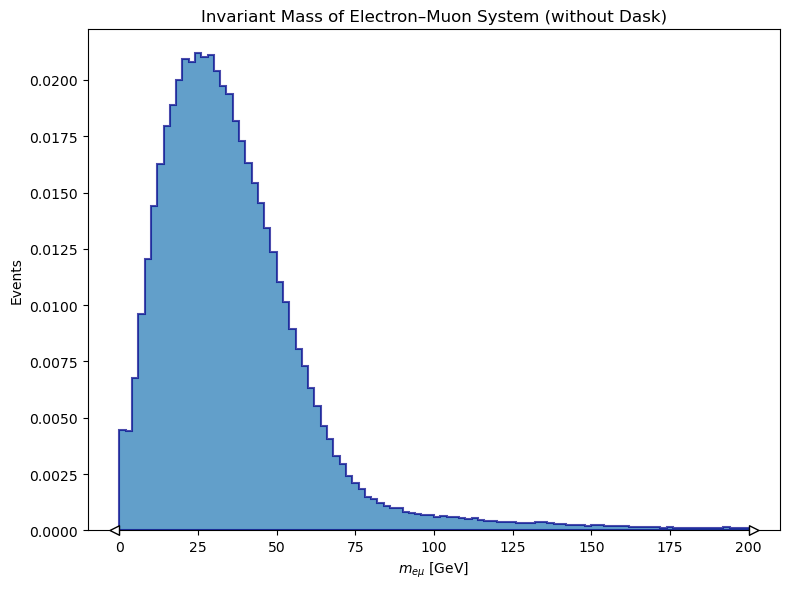

In [17]:
%time 
h_regular = hist.Hist(hist.axis.Regular(100, 0, 200, name="mass", label=r"$m_{e\mu}$ [GeV]"))
h_regular.fill(all_masses)
fig, ax = plt. subplots(figsize=(8, 6))

h_regular.plot1d(
    ax=ax, 
    histtype="fill", 
    linewidth=1.5,
    density = True,
    alpha = 0.7,
    edgecolor = "darkblue"
    )


ax.set_ylabel("Events")
ax.set_title("Invariant Mass of Electron–Muon System (without Dask)")
# ax.grid(True)
plt.tight_layout()
plt.show()


## THIS IS WITH DASK

In [18]:
from coffea_casa import CoffeaCasaCluster

client = Client("tls://localhost:8786")



In [19]:
client.scheduler_info()

Comm: tls://192.168.197.237:8786,Workers: 0
Dashboard: /user/anujraghav.physics@gmail.com/proxy/8787/status,Total threads: 0
Started: 2 hours ago,Total memory: 0 B


In [20]:
start = time.perf_counter()

client.wait_for_workers(n_workers= 1)
print(f"Workers ready: {len(client.scheduler_info()['workers'])}")
print(f"Dashboard: {client.dashboard_link}")
print(f"Submitting {len(root_files)} files to the cluster..")

futures = client.map(process_file, root_files)
progress(futures)
results = client.gather(futures)

all_masses = np.concatenate([r for r in results if len(r)>0])

elapsed = time.perf_counter() - start 

print(f"Total events processed: {len(all_masses)}")
print(f"Processing time: {elapsed:.2f} s")

KeyboardInterrupt: 

In [74]:
# Number of workers  connected
print(len(client.scheduler_info()['workers']))

0


In [62]:
client.close()